In [1]:
import img_utils
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pprint import pprint
from tqdm import tqdm
from naive_bayes import NaiveBayes
from logistic_regression import LogisticRegression

%matplotlib inline

In [2]:
imgs = img_utils.load_dataset()

100%|██████████| 2269/2269 [00:14<00:00, 151.65it/s]


In [3]:
sizes = [1, 2, 4, 8, 16, 32, 64]
params = {'nb':[], 'lr':[]}

In [4]:
for size in tqdm(sizes):
    (x_train, x_test, y_train, y_test), labels = img_utils.make_train_test_sets(img_utils.downsize_set(imgs, size))
    nb = NaiveBayes()
    lr = LogisticRegression()
    nb.fit(x_train, y_train)
    params['nb'].append(nb.model.class_prior_.size + nb.model.theta_.size + nb.model.sigma_.size)
    lr.fit(x_train, y_train)
    params['lr'].append(lr.model.coef_.size + lr.model.intercept_.size)


    
    

100%|██████████| 7/7 [06:01<00:00, 88.87s/it]


In [31]:
pprint(params['nb'])

[28, 100, 388, 1540, 6148, 24580, 98308]


In [32]:
pprint(params['lr'])

[16, 52, 196, 772, 3076, 12292, 49156]


In [33]:
n_features = [size**2*3 for size in sizes]
n_features

[3, 12, 48, 192, 768, 3072, 12288]

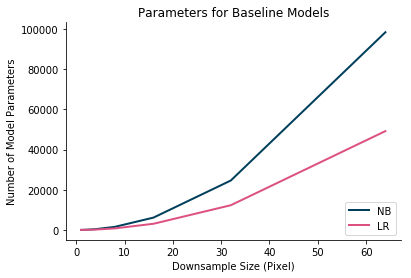

In [34]:
fig, ax = plt.subplots(1, 1)
img_utils.lineplot(ax, sizes, [params['nb'], params['lr']], 
                   'Downsample Size (Pixel)', 'Number of Model Parameters',
                   'Parameters for Baseline Models', color=[0, 3], label=['NB', 'LR'], multi=True)

In [47]:
def get_nb_params(size, n_classes=4):
    return n_classes + 2*(3*size**2)*n_classes

def get_lr_params(size, n_classes=4):
    return n_classes + (3*size**2)

def get_n_features(size):
    return 3*size**2

get_nb_params(128)
get_lr_params(64)

12292

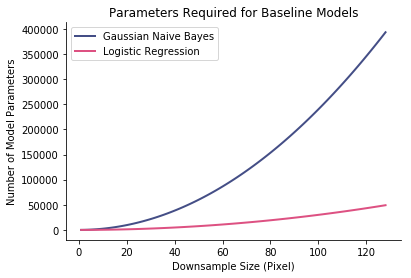

In [66]:
sizes_lin = np.linspace(1, 128, 100)
sizes_nb = [get_nb_params(size) for size in sizes_lin]
sizes_lr = [get_lr_params(size) for size in sizes_lin]
# sizes_nf = [get_n_features(size) for size in sizes_lin]
fig, ax = plt.subplots(1, 1)
img_utils.lineplot(ax, sizes_lin, [sizes_nb, sizes_lr], 
                   'Downsample Size (Pixel)', 'Number of Model Parameters',
                   'Parameters Required for Baseline Models', color=[1, 3], label=['Gaussian Naive Bayes', 'Logistic Regression'], 
                    multi=True, loc="upper left")
# plt.savefig('../report/param_graph.png', dpi=300, bbox_inches='tight')